In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Patient Severity Score for Electronic Health Records.csv to Patient Severity Score for Electronic Health Records.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [ ]:
import keras
print(keras.backend.backend())

tensorflow


In [ ]:
#Laden des Datensatzes
data = pd.read_csv("Patient Severity Score for Electronic Health Records.csv")
print(type(data))
data.head()
print(data.ndim)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
2
(79540, 7)


In [ ]:
#Features und Labels definieren
features = data[["TEMPF","PULSE","RESPR","BPSYS","BPDIAS","POPCT"]]
label = data["SCORE"]

print(type(features))
print(type(label))


#Daten in Trainings- und Testsets aufteilen

train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size= 0.2, random_state= 0)

print(features.shape)
print(features.ndim)
print("")
print(label.shape)
print(label.ndim)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(79540, 6)
2

(79540,)
1


In [ ]:
#Merkmale normalisieren
scalar = StandardScaler()
train_features = scalar.fit_transform(train_features)
test_features = scalar.transform(test_features)

In [ ]:
#Modell aufstellen
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modell kompilieren
 #model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
from keras.optimizers import SGD
model.compile(optimizer= SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modell trainieren
history = model.fit(train_features, train_labels, epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6089 - loss: 1.0020 - val_accuracy: 0.7747 - val_loss: 0.6153
Epoch 2/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7886 - loss: 0.5701 - val_accuracy: 0.8268 - val_loss: 0.4447
Epoch 3/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8354 - loss: 0.4209 - val_accuracy: 0.8620 - val_loss: 0.3603
Epoch 4/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8638 - loss: 0.3452 - val_accuracy: 0.8810 - val_loss: 0.3080
Epoch 5/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8897 - loss: 0.2973 - val_accuracy: 0.8989 - val_loss: 0.2720
Epoch 6/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9051 - loss: 0.2575 - val_accuracy: 0.9124 - val_loss: 0.2393
Epoch 7/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9181 - loss: 0.2280 - val_accuracy: 0.9232 - val_loss: 0.2140
Epoch 8/70
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9262 - loss: 0.2069 - 

In [ ]:
#Modell bewerten

loss, test_accuracy = model.evaluate(test_features, test_labels)
print('Test Accuracy:', test_accuracy)

498/498 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9865 - loss: 0.0406
Test Accuracy: 0.9871134161949158


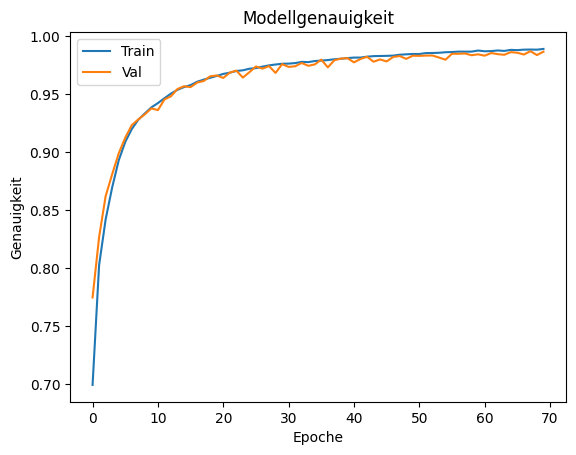

In [ ]:
# Trainingsverlauf plotten
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modellgenauigkeit')
plt.ylabel('Genauigkeit')
plt.xlabel('Epoche')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model.save('patient_severity_model.h5')

In [ ]:
import joblib
joblib.dump(scalar, 'scalar_transform.pkl')

['scalar_transform.pkl']